1.**Linear Regression**

1.0000000000000004
[0.6]


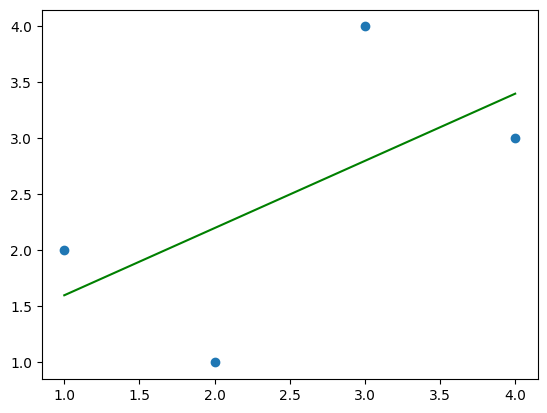

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(2021)
X = np.array([1,2,3,4])
y = np.array([2,1,4,3])
data = X.reshape(-1,1) #Should change shape as the function desires
model = LinearRegression()
model.fit(X=data, y=y)
print(model.intercept_) #bias
print(model.coef_) #coefficient
pred = model.predict(data)
plt.scatter(X, y)
plt.plot(X, pred, color='green')

**2.Multivariate Regression**

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
diabetes = load_diabetes()
data, target = diabetes["data"], diabetes["target"]
df = pd.DataFrame(data, columns=diabetes["feature_names"])
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3) #test size 0.3==> test sample 30%, train sampe 70%
multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)
multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)
print(f"Multi Regression Train MSE is {multi_train_mse:.4f}")
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")

Multi Regression Train MSE is 3034.2645
Multi Regression Test MSE is 2562.2854


**Lasso, Ridge, ElasticNet**

-Lasso: L1-norm, square form ==> Remove less importatnt features quick

If alpha is too big, it might not converge

-Ridge: L2-norm, circule form ==> Smooth, not removing features

-ElasticNet: combination of two methods



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=1.0) / elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5) / ridge.fit~
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Lasso MSE:", mse)

**Multiclass Classification**

OvO: One vs One, n(n-1)/2 classifers are needed. Each classifier decide whether it's closer to A or B.

OvR: One vs Rest, Each classifies decide whether it's A or not.

Generally, both method shows no difference in speed and accuracy.

However, OvR can perform poorly if class imbalance is severe or boundary of each class is complex.
OvO might not perform well if there are a lot of classes.

Consider odds(y/1-y) to change decision rule

**Decision Tree**

Pruning: dealing with overfitting



pre-pruning: Stop splitting if improvement is small
==> risk of underfitting / not overfitting and low time cost



post-pruning: make full tree and remove if it's worse
==> time-costly, not underfitting

**DecisionTreeClassifier**

critierion= 'gini': simple, faster   


'entropy': perform better when imbalance of class exists, log based.

**DecisionTreeRegressor**


criterion= 'squared_error': default, aim to reduce big errors, weak to outliers



'absolute_error': robust to outliers, non-differential


**Parameters for both**

max_depth, min__samples__split: least number of samples to be divided



min_samples_leaf: least number of samples to be leaf  / max_leaf_nodes



ccp_alpha: if it's bigger, more pruning occurs(post-pruning)

[Text(0.5, 0.75, 'x[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

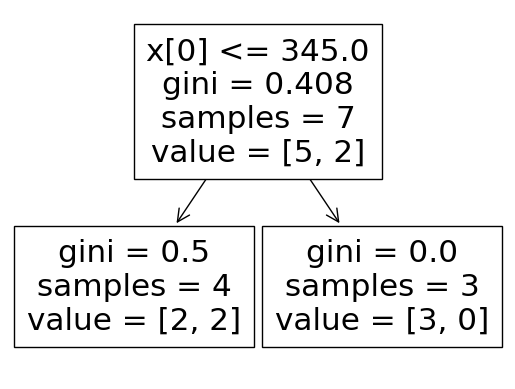

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=1) #Arguments: criterion(default:gini, entropy available),max_depth (default = None), min_samples_split (default = 2)
tree.fit(data["value"].to_frame(), data["label"])
plot_tree(tree)

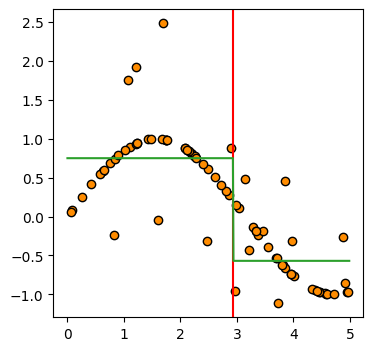

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
data = np.sort(np.random.uniform(low=0, high=5, size=(80, 1)))
label = np.sin(data).ravel()
label[::5] += 3 * (0.5 - np.random.uniform(0, 1, 16))
viz_test_data = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
first_divide = DecisionTreeRegressor(max_depth=1)
first_divide.fit(data, label)
first_divide_pred = first_divide.predict(viz_test_data)
plt.figure(figsize=(4,4))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, first_divide_pred, color="C2")


[Text(0.5, 0.75, 'x[0] <= 3.065\nsquared_error = 0.599\nsamples = 80\nvalue = 0.253'),
 Text(0.25, 0.25, 'squared_error = 0.156\nsamples = 52\nvalue = 0.71'),
 Text(0.75, 0.25, 'squared_error = 0.313\nsamples = 28\nvalue = -0.596')]

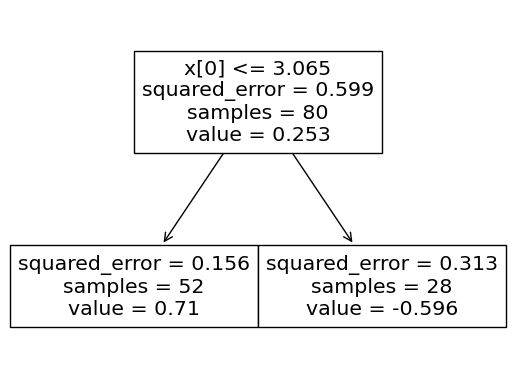

In [ ]:
plot_tree(first_divide)

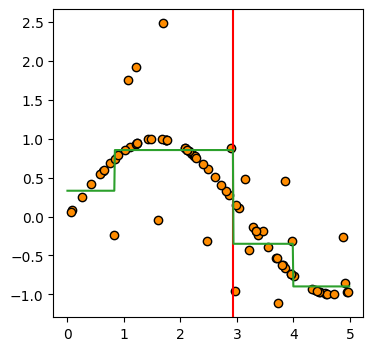

In [ ]:
second_divide = DecisionTreeRegressor(max_depth=2)
second_divide.fit(data, label)
#prediction
second_divide_pred = second_divide.predict(viz_test_data)
plt.figure(figsize=(4,4))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(second_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, second_divide_pred, color="C2")

[Text(0.5, 0.8333333333333334, 'x[0] <= 3.065\nsquared_error = 0.599\nsamples = 80\nvalue = 0.253'),
 Text(0.25, 0.5, 'x[0] <= 0.846\nsquared_error = 0.156\nsamples = 52\nvalue = 0.71'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.259\nsamples = 15\nvalue = 0.494'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.087\nsamples = 37\nvalue = 0.798'),
 Text(0.75, 0.5, 'x[0] <= 3.68\nsquared_error = 0.313\nsamples = 28\nvalue = -0.596'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.036\nsamples = 10\nvalue = -0.184'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.32\nsamples = 18\nvalue = -0.825')]

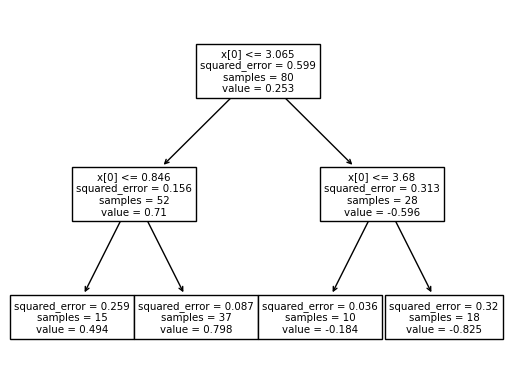

In [ ]:
plot_tree(second_divide)

**Model Evaluation**

**Sampling**


*   Hold-out: Simply divide data into two groups, train set and test set.

Example)
```
from sklearn.metrics import accuracy_score

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)
```

*   Cross-validation: Divide into k 'folds' ==> Each fold becomes "test set" and others become train set ==> return each accuracy score

```
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, data.data, data.target, cv=5)
print(f'K-Fold Cross Validation Accuracy: {scores.mean():.2f}')
```
==>scores will contain 5 accuracy scores.



*   BootStrapping: Use when data is scarce. Making new data set by picking up samples with replacement

==>Still, 36.8% of samples do not appear ==> Bias, High cost





**Performance Measure**

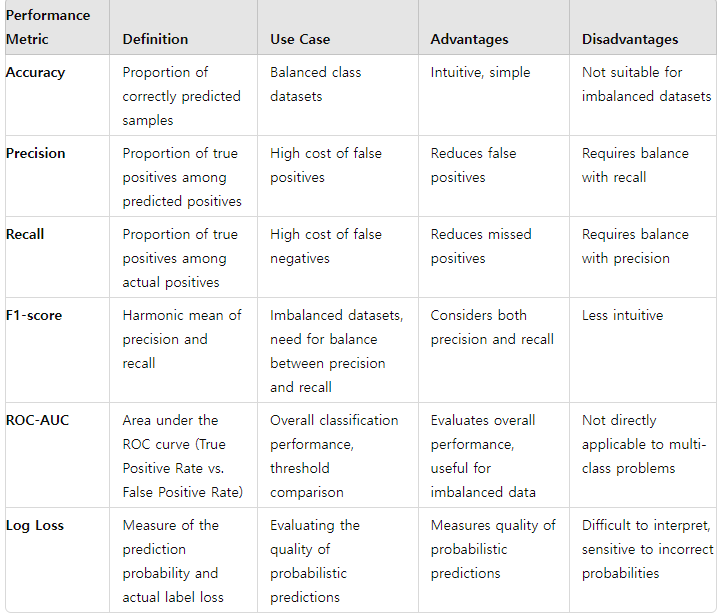



**k-Nearest Neighbors:**

consider k number of neighbors => vote to classify/regression

larger k will make model more simple.

Easy to understand, Fast algorithm

But curse of dimension, scaling issue exists.



Parameters:

**n_neighbors**: number of neigbhors

**weights**: 'uniform': all neighbors are equally treated regardless of distance

'distance': closer neighbors have stronger influence on decision.



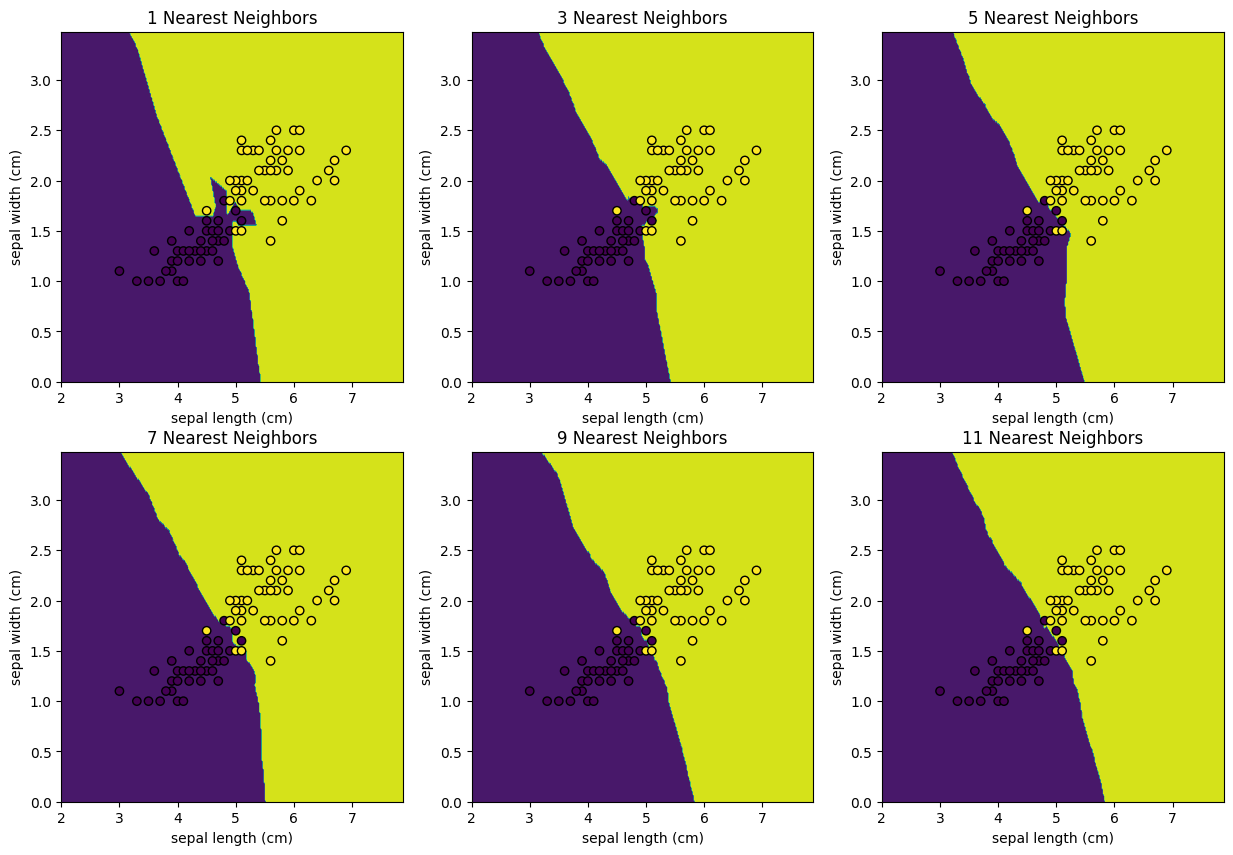

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()
np.random.seed(2021)
data, target = iris.data, iris.target
data = iris.data
target = iris.target
data = data[target != 0, 2:]
target = target[target != 0]
data = pd.DataFrame(data)
target = pd.DataFrame(target)
target = target.loc[~data.duplicated()].values.flatten()
data = data.loc[~data.duplicated()].values
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for idx, n in enumerate(range(1, 12, 2)):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(data, target)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = axes[idx//3, idx%3]
    ax.contourf(xx, yy, Z)
    ax.scatter(
        data[:, 0], data[:, 1], c=target, alpha=1.0, edgecolor="black"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title(f"{n} Nearest Neighbors")

**NLP Methods:**

1. Use word tokenizers to divide sentences into words. (In fact, most of vectorizors automatically tokenize them by themself)

2. Use NLP method to vectorize data
3. Use vectorized data to exericse ML methods

**Word Tokenizers**:

-Default tokenizers for CountVecotrizer and TfidfVectorizer:

space and punctuation become standards of each word.

-NLTK(Natural Langauage Toolkit), Traditional ML appraoch(ie. Markov/CRF):


1.   Tokenize
```
 from nltk.tokenizer import word_tokenizer

 vectorizer = TfidfVectorizer(tokenizer=nltk_tokenizer, stop_words='english')

 X = vectorizer.fit_transform(documents)

 train_matrix = cnt_vectorizer.fit_transform(train_text)
```

2. Tag word class
```
from nltk import pos_tag
tagged_words = pos_tag(words)
```
3.  Stemming
```
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
print("Stemmed Words:", stemmed_words)
```

-spaCy, Deep learning based, applicable

```
import spacy
nlp = spacy.load("en_core_web_sm")
text = "I love programming. It's fun!"
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]
print("Sentences:", sentences)
# Output: ['I love programming.', "It's fun!"]

words = [(token.text, token.pos_) for token in doc]
print("Words and POS Tags:", words)
# Output: [('I', 'PRON'), ('love', 'VERB'), ('programming', 'NOUN'), ('.', 'PUNCT'), ('It', 'PRON'), ("'s", 'AUX'), ('fun', 'ADJ'), ('!', 'PUNCT')]

entities = [(ent.text, ent.label_) for ent in doc.ents]
print("Named Entities:", entities)
# Output: []
```

**sklearn.feature_extraction.text**

-CountVectorizer: merly calculate frequency of each vocab.

-TfidfVectorizer: Combine TF-IDF to pose weight for each word

**Term Frequency**: If a word appears a lot in "single document", consider this word as important(Higher weight)

**Inverse Document Frequency**: If most of documents contain a certain word, we should consider this word as non-unique, not explaining the document.

IDF(vocab)=log(Total number of documents/1+number of documnets containing vocab)

**Naive Bayesian:**

Suppose all attributes are independent for each other ==> Simple Model

Strong points: Simple, Non-Overfitting, less computational cost

Weak points: Hard to handle numerical type/non-linear relationship. Underfitting

if one prob becomes zero ==> Predicted prob becomes 0

+ Laplacian Correction to fix this (If data is large enough, add one tuple to prevent prob 0)



In [ ]:
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
newsdata = fetch_20newsgroups(subset='train')
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_text = newsdata.data
train_target = newsdata.target
test_text = newsdata_test.data
test_target = newsdata_test.target
train_text = pd.Series(train_text)
test_text = pd.Series(test_text)
# Define a regular expression and cleanse the train and test text so that only letters remain.
re_pattern ="[^a-zA-Z0-9\ ]"
train_text = train_text.str.replace(re_pattern,"",regex=True)
test_text = test_text.str.replace(re_pattern,"",regex=True)
# Convert uppercase letters to lowercase.
train_text = train_text.str.lower()
test_text = test_text.str.lower()
nltk.download('punkt')
cnt_vectorizer = CountVectorizer(tokenizer=word_tokenize)
cnt_vectorizer.fit(train_text)
train_matrix = cnt_vectorizer.fit_transform(train_text)
test_matrix = cnt_vectorizer.transform(test_text)
naive_bayes = MultinomialNB()
naive_bayes.fit(train_matrix,train_target)
train_pred=naive_bayes.predict(train_matrix)
test_pred=naive_bayes.predict(test_matrix)
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)


print(f"Train Accuracy is {train_acc:.4f}")
print(f"Test Accuracy is {test_acc:.4f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train Accuracy is 0.9512
Test Accuracy is 0.6936


In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.5 MB/s eta 0:00:00


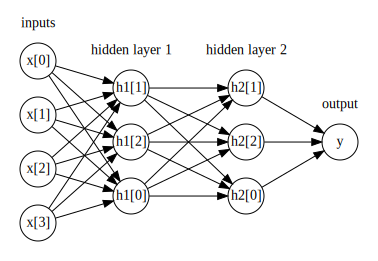

In [ ]:
import mglearn
display(mglearn.plots.plot_two_hidden_layer_graph())

hidden_layer_sizes:

activation:

**'logistic'**: well-known as sigmoid, **Vanishing Gradient Problem**

As its range is [0,1], it can invoke inefficient updating as the weight cannot be negative

**'tanh'**: As its range is [-1,1], Faster than logistic. However vanishing gradient problem remains.

**'relu'**: max(0,x). Solved vanishing gradient problem, converges fast.

**Dying relu problem:**
As it returns 0 for all non-positive input, some neurons might be dead.

**--> underfitting, model complexity loss**


This can be solved by Leaky ReLU( max(0.01x,x) ) or Parametric  ReLU max(ax,x)

But not widely used as its complexity, inefficiency, voltality


solver:

**'lbfgs'**: LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno):

Quasi-newton method, computation cost high, high precision ==>
appropriate for small dataset

**'sgd'**: Random sampling, gradient method: Converges fast ==>Appropraite for big datas set

**'adam'**: adam is better than sgd for many cases(i.g: lot of noise, complex model, efficiency in setting parameter)



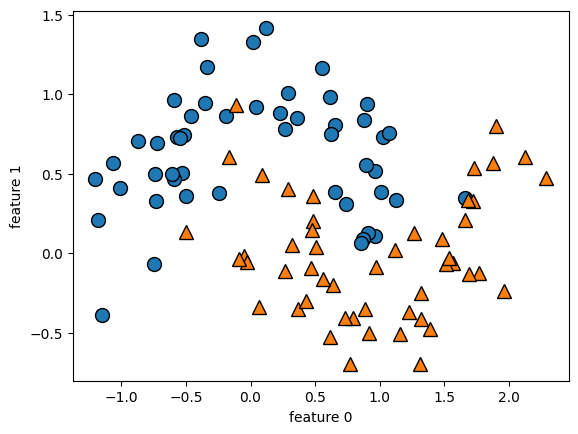

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


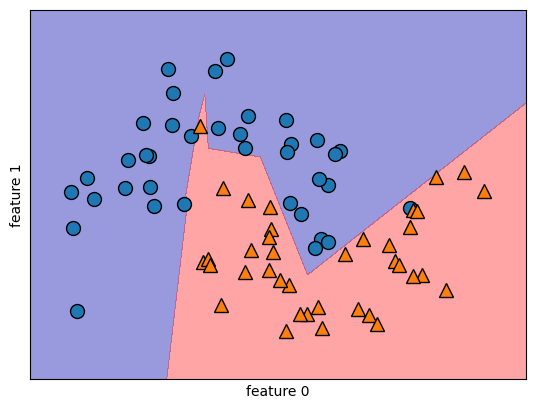

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) #default test_size = 0.25
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.4)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

**StandardScaler**:

Make data mean:0 std:1 ==> when data is normally distributed

X-mean/std (normalization)

**MinMaxScaler**:

X_scaled = (X - X_min) / (X_max - X_min)

==>aim to fit in [0,1] ==> weak to outliers

**MaxAbsScaler**:

X_scaled = X / max(abs(X))
==>weak to outliers, might ruin original distribution


**RobustScaler**:

X_scaled = (X - median) / Q3-Q1

It is robust to outliers, but it ruins original distribution and meaning.

**Clustering:**

Unsupervised data  ==> separate in several groups.

**Methods:**

*   K-means Alogrithm: divide into K clusters.
Simple, Efficient /
Sensitive to outliers & K + Non-convex shapes cannot be treated
```
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
```


*  Hierachcial Clustering:  Make trees
No need to set k, Hierachical Structures can summarize them well / Expensive, one wrong decision affects all...
```
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(X)
```

* DBSCAN: Clustering by density

Shape flexity, Robust to noises/ Costly, Sensitive to initial values

```
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

```
eps: maximum radius for each cluster
min_samples: minimum number of elements for each cluster

Before Clustering:

*  **Check whether data set is just randomly distributed or not**

*   Hopkins Statistic: when random distribution, close to 0.5 Else, 0.
```
def hopkins_statistic(data):
    n = len(data)
    
    # Generate random points
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    random_points = np.random.uniform(min_val, max_val, (n, data.shape[1]))

    # Compute distances to nearest neighbor in dataset
    dist_data = np.min(cdist(data, data), axis=1)
    dist_random = np.min(cdist(random_points, data), axis=1)

    # Calculate Hopkins statistic
    H = np.sum(dist_random) / (np.sum(dist_random) + np.sum(dist_data))
    
    return H
```

*  **Determine the number of clusters:**

Elbow method:  The "elbow" in the plot is the point where the rate of within-cluster variance decrease sharply slows down.


Cross-validation method


*   **Cluster Evaluation**

Silhouette Coefficient:

(average dist. from elements of nearest cluster)-(average dist within the cluster) / max(a,b)

close to 1: well matched  close to 0: not divided well

close to -1: mismatched

**Criteria:**

Homogenity: The purer, the better

Completeness: Consider ground truth if you can

Rag Bag: Don't put ambiguous elements in a pure cluster; Put in to rag bag(other/Not determined catergory..)

Small Cluster preservation: Don't split clusters too much